# Kritya Shree S - 18BCS093

### 2. Load the dataset and set the target and feature variables. Split the dataset into training and test dataset. Build decision tree classifier with Entropy criteria. Perform Prediction for test dataset using Entropy and print the results in the form of confusion matrix, accuracy and classification report. visualize the decision tree.

### 

## Importing the necessary packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [5]:
df = pd.read_csv("pima-indians-diabetes.csv")
df

,Pregnencies,Glucose,BP,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Setting Target and Features

In [10]:
features = np.column_stack([df.Pregnencies, df.Glucose, df.BP, df.Skin_Thickness, df.Insulin, df.BMI, 
                            df.Diabetes_Pedigree,df.Age])
target = df.Outcome

## Splitting into Training and Testing

In [11]:
features_col = ["Pregnencies", "Glucose","BP", "Skin_Thickness", "Insulin", "BMI", "Diabetes_Pedigree", "Age"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=75) 
# 75% Training 25% testing

## Decision Tree classification (with Entropy criteria)

In [31]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Print the results in the form of confusion matrix, accuracy and classification report.

### Confusion Matrix

In [32]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

# storing the values
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[118   5]
 [ 47  22]]


### Accuracy

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7291666666666666


### Classification Report

In [34]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.96      0.82       123
           1       0.81      0.32      0.46        69

    accuracy                           0.73       192
   macro avg       0.76      0.64      0.64       192
weighted avg       0.75      0.73      0.69       192



## Visualizing Decision tree using graphviz and pydotplus packages

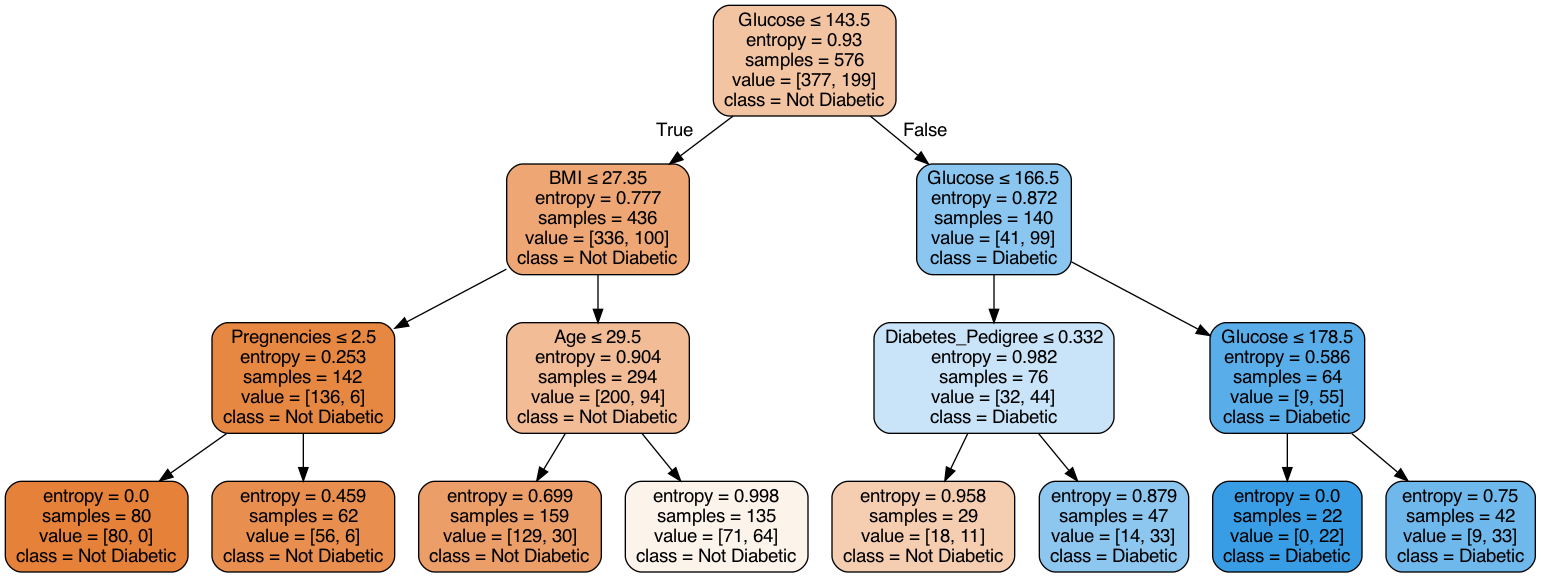

In [35]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features_col,class_names=['Not Diabetic','Diabetic'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Decision Tree.png')
Image(graph.create_png())